In [19]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

a)

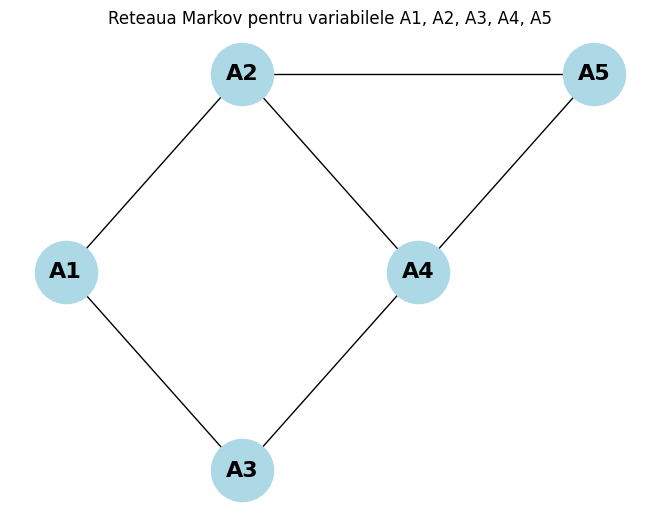

Clicile retelei Markov sunt:
['A1', 'A2']
['A1', 'A3']
['A4', 'A5', 'A2']
['A4', 'A3']


In [20]:
model = MarkovNetwork()

nodes = ['A1', 'A2', 'A3', 'A4', 'A5']
model.add_nodes_from(nodes)

edges = [('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')]
model.add_edges_from(edges)

pos = {'A1': (0, 1), 'A2': (1, 2), 'A3': (1, 0), 'A4': (2, 1), 'A5': (3, 2)}

nx.draw(model, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=16, font_weight='bold')
plt.title("Reteaua Markov pentru variabilele A1, A2, A3, A4, A5")
plt.show()


cliques = list(nx.find_cliques(model))
print("Clicile retelei Markov sunt:")
for clique in cliques:
    print(clique)

b)

In [36]:
factor_1 = DiscreteFactor(['A1', 'A2'], [2, 2], [np.exp(0 + 0), np.exp(0 + 2), np.exp(1 + 0), np.exp(1 + 2)])
factor_2 = DiscreteFactor(['A1', 'A3'], [2, 2], [np.exp(0 + 0), np.exp(0 + 3), np.exp(1 + 0), np.exp(1 + 3)])
factor_3 = DiscreteFactor(['A3', 'A4'], [2, 2], [np.exp(0 + 0), np.exp(0 + 4), np.exp(3 + 0), np.exp(3 + 4)])
factor_4 = DiscreteFactor(['A2', 'A4', 'A5'], [2, 2, 2], [np.exp(0 + 0 + 0), np.exp(0 + 0 + 5), np.exp(0 + 4 + 0), np.exp(0 + 4 + 5), np.exp(2 + 0 + 0), np.exp(2 + 0 + 5), np.exp(2 + 4 + 0), np.exp(2 + 4 + 5)])

model.add_factors(factor_1, factor_2, factor_3, factor_4)

bp_infer = BeliefPropagation(model)

joint_distribution = bp_infer.map_query(['A1', 'A2', 'A3', 'A4', 'A5'])

print("Starile de probabilitate maxima pentru fiecare variabila:")
for var, state in joint_distribution.items():
    print(f"{var}: {state}")

Starile de probabilitate maxima pentru fiecare variabila:
A1: 1
A2: 1
A3: 1
A4: 1
A5: 1
